In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import category_encoders as ce

In [13]:
df = pd.read_csv('Advertising.csv')

# Pre-processing of the data

In [9]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [10]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

There are no missing values in the given dataset

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [12]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


# Visualizing the given data

<Figure size 800x600 with 0 Axes>

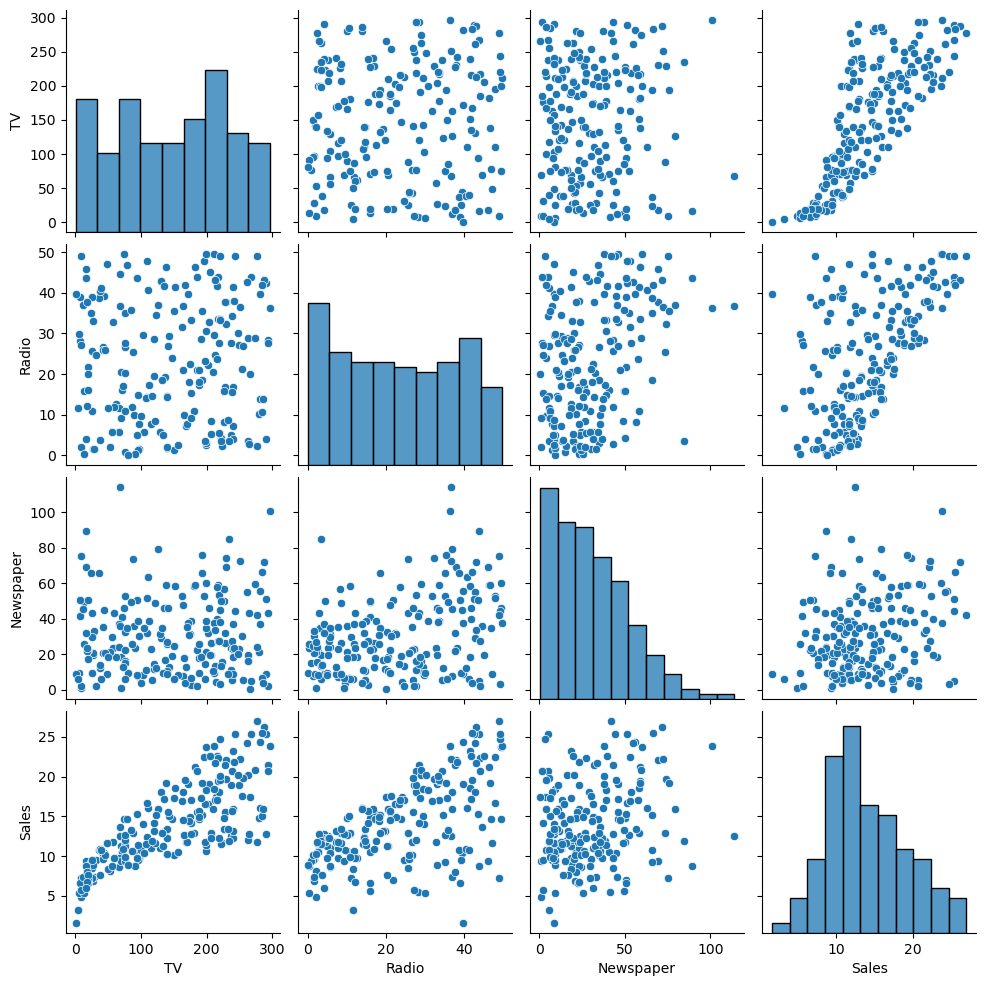

In [27]:
plt.figure(figsize=(8,6))
sns.pairplot(df)
plt.show()

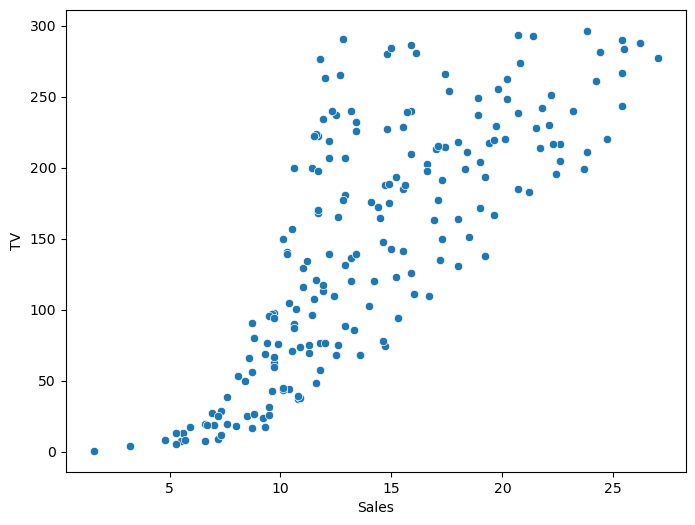

In [28]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Sales',y='TV',data=df)
plt.show()

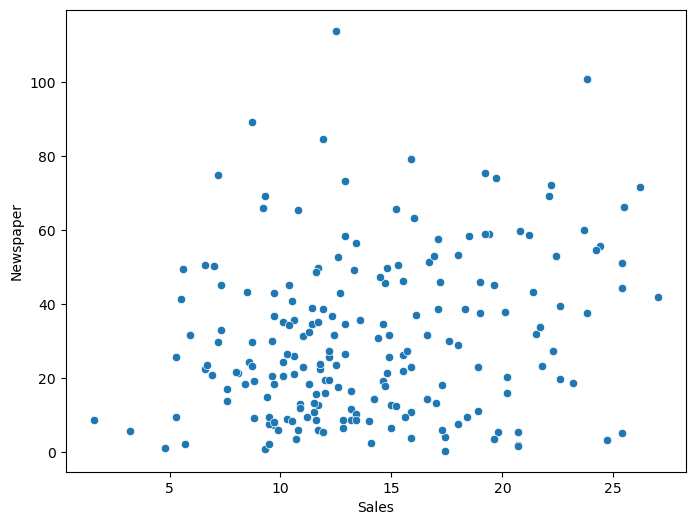

In [29]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Sales',y='Newspaper',data=df)
plt.show()

In [14]:
corr = df.corr()

In [15]:
corr

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


<Axes: >

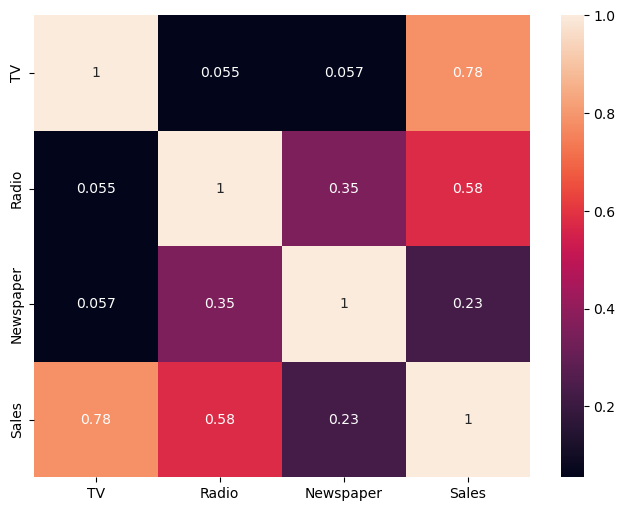

In [16]:
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True)

Here, the TV has highest correlation.

In [30]:
x = df.drop('Sales', axis=1)
y = df['Sales']

In [31]:
x.shape, y.shape

((200, 3), (200,))

In [32]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [33]:
x.shape

(200, 3)

In [35]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=101)

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
lr = LinearRegression()
lm = lr.fit(x_train, y_train)

In [39]:
y_pred = lm.predict(x_test)

In [40]:
from sklearn.metrics import mean_squared_error, r2_score

In [41]:
mse = mean_squared_error(y_test, y_pred)
mse

2.2987166978863787

In [42]:
rmse = np.sqrt(mse)
rmse

1.5161519375993882

In [43]:
r2=r2_score(y_test,y_pred)
r2

0.9185780903322445

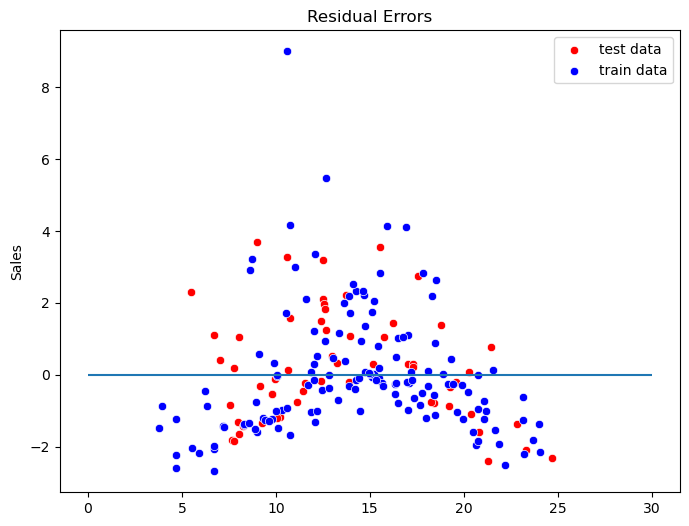

In [46]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=lm.predict(x_test), y=lm.predict(x_test) - y_test, color='r', label='test data')
sns.scatterplot(x=lm.predict(x_train), y=lm.predict(x_train) - y_train, color='b', label='train data')
plt.hlines(y=0, xmin=0, xmax=30)
plt.legend()
plt.title('Residual Errors')
plt.show()


In [47]:
test_score = lm.score(x_test, y_test)
test_score

0.9185780903322445

In [48]:
train_score = lm.score(x_train,y_train)
train_score

0.8856665510409361